<img src='logo/dsl-logo.png' width="500" align="center" />

# HR Competition

## Gradient Boost Model

Nachdem der Random Forest Classifier bereits sehr gute Ergebnisse erzielt hatte, sollte mit Gradient Boost eine weitere Ensemble Methode ausprobiert werden. Beim Gradient Boosting wird eine hohe Zahl an Decision Trees erzeugt, die mehrfach hintereinander durchlaufen werden, mit dem Ziel eine Cost Function zu optimieren. 

### Initializations

In [28]:
# benötigte Bibliotheken einbinden
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import learning_curve
%matplotlib inline

In [29]:
# Definition einer Klasse für Text Styles
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [30]:
# Laden der Trainings- und Testdaten
X = np.load(file='exchange/hr_06_X.npy')
X_train = np.load(file='exchange/hr_06_X_train.npy')
X_train_scaled = np.load(file='exchange/hr_06_X_train_scaled.npy')
X_test = np.load(file='exchange/hr_06_X_test.npy')
X_test_scaled = np.load(file='exchange/hr_06_X_test_scaled.npy')
y = np.load(file='exchange/hr_06_y.npy')
y_train = np.load(file='exchange/hr_06_y_train.npy')
y_test = np.load(file='exchange/hr_06_y_test.npy')

In [31]:
# Definition der Learning Curve-Methode
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

### Use Gradient Boost

In der Grundeinstellung erzeugt der Gradient Boost Classifier 100 Bäume, was sich am Parameter `n_estimators` ablesen lässt. Das Ergebnis ohne Optimierung liegt bereits bei 97,08% und damit sehr weit vorne. An der Learning Curve lässt sich erkennen, dass noch ein Underfitting vorliegt, welches im nächsten Schritt durch Hyperparameter Tuning verbessert werden soll.

In [32]:
# Gradient Boost initialisieren
clf = GradientBoostingClassifier()

In [33]:
clf.fit(X_train_scaled, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [34]:
# Score berechnen
clf.score(X_test_scaled, y_test)

0.97799999999999998

In [35]:
# Confusion Matrix und Classification Report erstellen
predictions = clf.predict(X_test_scaled)

In [36]:
print(confusion_matrix(y_test, predictions))

[[1524   12]
 [  32  432]]


In [37]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.98      0.99      0.99      1536
          1       0.97      0.93      0.95       464

avg / total       0.98      0.98      0.98      2000



In [38]:
# Train und Test Accuracy ausgeben
print("Train Accuracy :: ", accuracy_score(y_train, clf.predict(X_train_scaled)))
print("Test Accuracy  :: ", accuracy_score(y_test, predictions))

Train Accuracy ::  0.97625
Test Accuracy  ::  0.978


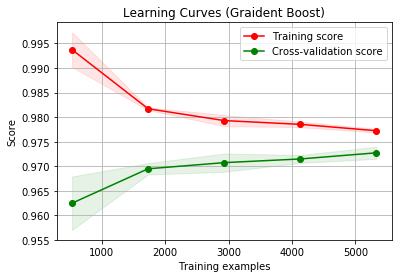

In [39]:
# Learning Curve berechnen
title = 'Learning Curves (Graident Boost)'
estimator = clf
plot_learning_curve(estimator, title, X_train_scaled, y_train)
plt.show()

### Hyperparameter Tuning Using GridSearchCV

Beim Gradient Boost Classifier müssen die Parameter `n_estimators` und `learning_rate` miteinander abgestimmt werden. Auch wenn der Algorithmus bereits sehr robust gegen Overfitting ist, kann mit dem Parameter `max_depth` die Tiefe der einzelnen Decision Trees begrenzt und somit eine höhere Generalisierbarkeit erreicht werden. Mit den durch GridSearchCV bestimmten optimalen Parametern konnte der Score auf 99,08% erhöht werden. Die Learning Curve zeigt außerdem, dass kein Underfitting mehr vorliegt. In einem nächsten Schritt wird noch geprüft, ob das Ergebnis durch Feature Selection weiter erhöht werden kann. 

In [40]:
# weitere Bibliothek importieren
from sklearn.model_selection import GridSearchCV

In [41]:
# Laden der Trainings- und Testdaten
X = np.load(file='exchange/hr_06_X.npy')
X_train = np.load(file='exchange/hr_06_X_train.npy')
X_train_scaled = np.load(file='exchange/hr_06_X_train_scaled.npy')
X_test = np.load(file='exchange/hr_06_X_test.npy')
X_test_scaled = np.load(file='exchange/hr_06_X_test_scaled.npy')
y = np.load(file='exchange/hr_06_y.npy')
y_train = np.load(file='exchange/hr_06_y_train.npy')
y_test = np.load(file='exchange/hr_06_y_test.npy')

In [42]:
# Gradient Boost initialisieren
clf = GradientBoostingClassifier()

In [46]:
param_space = {'n_estimators':[1000,1500,2000], 'max_depth':[7,9,11], 'learning_rate':[0.025,0.05,0.1]}

In [47]:
# Grid Search Crossvalidation definieren 
gs = GridSearchCV(clf, param_space, cv=5, n_jobs=-1)

In [48]:
# Modelle erstellen
gs.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [1000, 1500, 2000], 'max_depth': [7, 9, 11], 'learning_rate': [0.025, 0.05, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


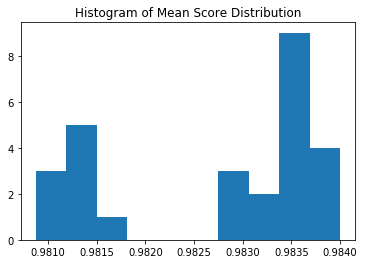

In [49]:
# Histogramm erstellen
scores = pd.DataFrame(gs.grid_scores_)
plt.hist(scores['mean_validation_score'], bins=10)
plt.title('Histogram of Mean Score Distribution');

In [50]:
# besten Modellscore ausgeben
gs.best_score_

0.98399999999999999

In [51]:
# beste Parameterkombination ausgeben
gs.best_params_

{'learning_rate': 0.025, 'max_depth': 7, 'n_estimators': 2000}

In [52]:
# Gradient Boost mit bester Parameterkombination initialisieren
clf = GradientBoostingClassifier(max_depth=7, n_estimators=2000, learning_rate=0.025)

In [53]:
clf.fit(X_train_scaled, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.025, loss='deviance', max_depth=7,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=2000,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [54]:
# Score ausgeben
clf.score(X_test_scaled, y_test)

0.98399999999999999

In [55]:
# Confusion Matrix erstellen
predictions = clf.predict(X_test_scaled)

In [56]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[1528    8]
 [  24  440]]


In [57]:
# Train und Test Accuracy ausgeben
print("Train Accuracy :: ", accuracy_score(y_train, clf.predict(X_train_scaled)))
print("Test Accuracy  :: ", accuracy_score(y_test, predictions))

Train Accuracy ::  1.0
Test Accuracy  ::  0.984


In [58]:
# Laden der Dictionary-Datei
cm_dict = np.load("exchange/hr_20_cm_dict.npy")
print(cm_dict.item())

{'neural_net': {'cm': array([[1494,   42],
       [  29,  435]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1520,   16],
       [  24,  440]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1421,  115],
       [ 306,  158]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1522,   14],
       [  24,  440]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1471,   65],
       [ 108,  356]]), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1497,   39],
       [ 155,  309]]), 'label': 'Deep Neural Network'}, 'nearest_neighbor': {'cm': array([[1504,   32],
       [  26,  438]]), 'label': 'Nearest Neighbor'}, 'gradient_boost': {'cm': array([[1841,    6],
       [  17,  536]]), 'label': 'Gradient Boost'}}


In [59]:
# Aktualisieren der Werte der Confusion Matrix und exportieren der Ergebnisse
cm_dict.item().update({'gradient_boost':{'cm': cm, 'label': 'Gradient Boost' }})
print(cm_dict)
np.save("exchange/hr_20_cm_dict.npy", cm_dict)

{'neural_net': {'cm': array([[1494,   42],
       [  29,  435]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1520,   16],
       [  24,  440]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1421,  115],
       [ 306,  158]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1522,   14],
       [  24,  440]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1471,   65],
       [ 108,  356]]), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1497,   39],
       [ 155,  309]]), 'label': 'Deep Neural Network'}, 'nearest_neighbor': {'cm': array([[1504,   32],
       [  26,  438]]), 'label': 'Nearest Neighbor'}, 'gradient_boost': {'cm': array([[1528,    8],
       [  24,  440]]), 'label': 'Gradient Boost'}}


In [60]:
# Classification Report erstellen
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.98      0.99      0.99      1536
          1       0.98      0.95      0.96       464

avg / total       0.98      0.98      0.98      2000



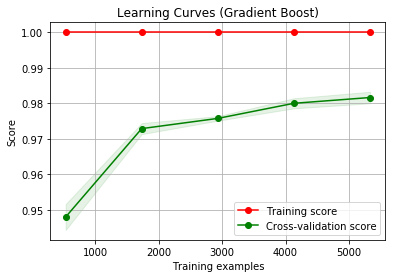

In [61]:
# Learning Curve berechnen
title = 'Learning Curves (Gradient Boost)'
estimator = clf
plot_learning_curve(estimator, title, X_train_scaled, y_train)
plt.show()

### Feature Selection for Gradient Boost

Durch Feature Selection wurden Attribute identifiziert, die aus dem Datenset entfernt werden können, ohne das Ergebnis zu verschlechtern oder sogar einen höheren Score zu erzielen. Im Falle des Gradient Boost Classifiers zeigt sich nur ein geringer Effekt durch das Entfernen von Spalten. Dennoch lässt sich deutlich erkennen, welche Attribute kaum einen Mehrwert für das Klassifizierungsproblem liefern.

In [62]:
# weitere Bibliotheken importieren
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from IPython.display import clear_output
import itertools as it

In [63]:
dff = pd.read_pickle('exchange/hr_01_cleaned_train.pkl')
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
satisfactionLevel       10000 non-null float64
yearsSinceEvaluation    10000 non-null float64
numberOfProjects        10000 non-null int64
averageMonthlyHours     10000 non-null int64
yearsAtCompany          10000 non-null int64
workAccident            10000 non-null category
hasLeftCompany          10000 non-null category
gotPromotion            10000 non-null category
department              10000 non-null category
salary                  10000 non-null category
dtypes: category(5), float64(2), int64(3)
memory usage: 439.7 KB


In [64]:
# Datentyp von Category in Object umwandeln
for col in dff.select_dtypes(['category']):
    print('transforming', col)
    dff[col] = dff[col].astype('str')

transforming workAccident
transforming hasLeftCompany
transforming gotPromotion
transforming department
transforming salary


In [65]:
# Features in List umwandeln und ausgeben
columns = list(dff.columns)
columns.remove('hasLeftCompany')
columns

['satisfactionLevel',
 'yearsSinceEvaluation',
 'numberOfProjects',
 'averageMonthlyHours',
 'yearsAtCompany',
 'workAccident',
 'gotPromotion',
 'department',
 'salary']

In [66]:
# Länge der Liste
len(columns)

9

In [68]:
# Anzahl der Kombinationen, wenn 0, 1, 2 Features rausnimmt
for i in range(0,3):
    print(len(set(it.combinations(columns,i))))

1
9
36


In [70]:
# Kombination der Features, die nicht berücksichtigt werden und Ausgabe der Scores 
results = pd.DataFrame([], columns=['combination', 'score'])
for i in range(0,3):
    combinations = set(it.combinations(columns,i))
    for idx, comb in enumerate(combinations):
        print()
        print('calculating... combinations with ' + str(i) + ' elements :: ' + str(idx + 1) + ' of ' + str(len(combinations)))
        comb = list(comb)
        comb.append('hasLeftCompany')
        df = pd.get_dummies(dff.drop(comb, axis=1)).join(dff[['hasLeftCompany']])
        y = df['hasLeftCompany'].values
        X = df.drop(['hasLeftCompany'], axis=1).values
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        clf = GradientBoostingClassifier(max_depth=7, n_estimators=2000, learning_rate=0.025)
        scores = cross_val_score(clf, X_train_scaled, y_train, cv=5, n_jobs=-1)
        results = results.append(pd.DataFrame([[','.join(comb), scores.mean()]], columns=results.columns))
        clear_output()
        print(color.BOLD + 'best scores so far:' + color.END)
        print(results.sort_values('score', ascending=False).head(5))

best scores so far:
                              combination     score
0  workAccident,department,hasLeftCompany  0.983750
0             workAccident,hasLeftCompany  0.983624
0                          hasLeftCompany  0.983624
0  gotPromotion,department,hasLeftCompany  0.983499
0               department,hasLeftCompany  0.983499


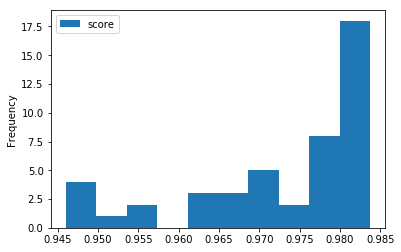

In [71]:
# Ausgabe der Scores als Diagramm
results.plot.hist();

In [72]:
# Ausgabe der kombinierten Features sortiert nach Score - besten Kombinationen
results.sort_values('score', ascending=False).head(10)

,combination,score
0,"workAccident,department,hasLeftCompany",0.983750
0,"workAccident,hasLeftCompany",0.983624
0,hasLeftCompany,0.983624
0,"gotPromotion,department,hasLeftCompany",0.983499
0,"department,hasLeftCompany",0.983499
0,"salary,hasLeftCompany",0.983499
0,"gotPromotion,hasLeftCompany",0.983374
0,"workAccident,gotPromotion,hasLeftCompany",0.983124
0,"department,salary,hasLeftCompany",0.982874
0,"gotPromotion,salary,hasLeftCompany",0.982874


In [73]:
# Ausgabe der ignorierten kombinierten Features sortiert nach Score - schlechtesten Kombinationen
results.sort_values('score', ascending=False).tail(10)

,combination,score
0,"yearsAtCompany,workAccident,hasLeftCompany",0.964873
0,"yearsAtCompany,gotPromotion,hasLeftCompany",0.964373
0,"yearsAtCompany,salary,hasLeftCompany",0.964249
0,"satisfactionLevel,yearsSinceEvaluation,hasLeft...",0.956000
0,"numberOfProjects,yearsAtCompany,hasLeftCompany",0.954872
0,"averageMonthlyHours,yearsAtCompany,hasLeftCompany",0.950249
0,"satisfactionLevel,averageMonthlyHours,hasLeftC...",0.948624
0,"satisfactionLevel,yearsAtCompany,hasLeftCompany",0.946625
0,"satisfactionLevel,numberOfProjects,hasLeftCompany",0.946499
0,"yearsSinceEvaluation,yearsAtCompany,hasLeftCom...",0.945999


In [74]:
# Features mit geringem Einfluss auf Modell rausnehmen und Trainings- und Testdataframes erstellen
df = pd.get_dummies(dff.drop(['workAccident','department', 'hasLeftCompany'], axis=1)).join(dff[['hasLeftCompany']])
y = df['hasLeftCompany'].values
X = df.drop(['hasLeftCompany'], axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [75]:
# Gradient Boost mit bester Parameterkombination initialisieren
clf = GradientBoostingClassifier(max_depth=9, n_estimators=1000, learning_rate=0.1)

In [76]:
clf.fit(X_train_scaled, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=9,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [77]:
# Score ausgeben
clf.score(X_test_scaled, y_test)

0.98550000000000004

In [78]:
# Confusion Matrix erstellen
predictions = clf.predict(X_test_scaled)

In [79]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[1531    5]
 [  24  440]]


In [80]:
# Train und Test Accuracy ausgeben
print("Train Accuracy :: ", accuracy_score(y_train, clf.predict(X_train_scaled)))
print("Test Accuracy  :: ", accuracy_score(y_test, predictions))

Train Accuracy ::  1.0
Test Accuracy  ::  0.9855


In [81]:
# Laden der Dictionary-Datei
cm_dict = np.load("exchange/hr_20_cm_dict.npy")
print(cm_dict.item())

{'neural_net': {'cm': array([[1494,   42],
       [  29,  435]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1520,   16],
       [  24,  440]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1421,  115],
       [ 306,  158]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1522,   14],
       [  24,  440]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1471,   65],
       [ 108,  356]]), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1497,   39],
       [ 155,  309]]), 'label': 'Deep Neural Network'}, 'nearest_neighbor': {'cm': array([[1504,   32],
       [  26,  438]]), 'label': 'Nearest Neighbor'}, 'gradient_boost': {'cm': array([[1528,    8],
       [  24,  440]]), 'label': 'Gradient Boost'}}


In [82]:
# Aktualisieren der Werte der Confusion Matrix und exportieren der Ergebnisse
cm_dict.item().update({'gradient_boost':{'cm': cm, 'label': 'Gradient Boost' }})
print(cm_dict)
np.save("exchange/hr_20_cm_dict.npy", cm_dict)

{'neural_net': {'cm': array([[1494,   42],
       [  29,  435]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1520,   16],
       [  24,  440]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1421,  115],
       [ 306,  158]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1522,   14],
       [  24,  440]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1471,   65],
       [ 108,  356]]), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1497,   39],
       [ 155,  309]]), 'label': 'Deep Neural Network'}, 'nearest_neighbor': {'cm': array([[1504,   32],
       [  26,  438]]), 'label': 'Nearest Neighbor'}, 'gradient_boost': {'cm': array([[1531,    5],
       [  24,  440]]), 'label': 'Gradient Boost'}}


In [83]:
# Classification Report erstellen
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99      1536
          1       0.99      0.95      0.97       464

avg / total       0.99      0.99      0.99      2000



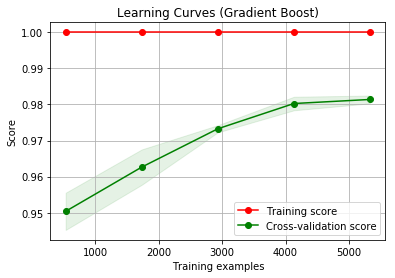

In [84]:
# Learning Curve berechnen
title = 'Learning Curves (Gradient Boost)'
estimator = clf
plot_learning_curve(estimator, title, X_train_scaled, y_train)
plt.show()